In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Gerekli kütüphaneleri yükleme
import numpy as np
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Gerekli NLTK veri setlerini indirme
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Stopword'leri tanımlama
stopWords = set(stopwords.words('turkish'))

In [ ]:
# Excel dosyasından veri setini yükleme
df_train = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Turkish/train.csv', encoding= 'unicode_escape')

In [ ]:
# Türkçe için basit bir stemmer fonksiyonu
def simple_stemmer(word):
    suffixes = ["lar", "ler", "ları", "leri", "dan", "den", "in", "un", "ın", "ün", "da", "de", "ta", "te", "dır", "dir", "dur", "dür", "tır", "tir", "tur", "tür"]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

In [ ]:
print("Veri setindeki toplam veri sayısı:", df_train.shape[0])


Veri setindeki toplam veri sayısı: 7709


In [ ]:
# Ön işleme fonksiyonları
def preprocess_initial(text):
    text = text.lower()  # Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]", " ", text)
    return text

def preprocess_stemming(text):
    text = preprocess_initial(text)
    text = nltk.word_tokenize(text)
    text = [simple_stemmer(word) for word in text if not word in stopWords]
    return " ".join(text)

def preprocess_lemmatization(text):
    text = preprocess_initial(text)
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text if not word in stopWords]
    return " ".join(text)

In [ ]:
# Veriyi ön işleme
df_train["initial"] = df_train["comment"].apply(preprocess_initial)
df_train["stemmed"] = df_train["comment"].apply(preprocess_stemming)
df_train["lemmatized"] = df_train["comment"].apply(preprocess_lemmatization)

X_initial = df_train["initial"]
X_stemmed = df_train["stemmed"]
X_lemmatized = df_train["lemmatized"]
y = df_train["Label"]

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train_initial, X_test_initial, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)
X_train_stemmed, X_test_stemmed, _, _ = train_test_split(X_stemmed, y, test_size=0.2, random_state=42)
X_train_lemmatized, X_test_lemmatized, _, _ = train_test_split(X_lemmatized, y, test_size=0.2, random_state=42)


In [ ]:
# Modeli tanımlama ve eğitme
def train_and_evaluate(model, X_train, X_test, y_train, y_test, visualize_confusion_matrix=False):
    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', model)])
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)

    # Modelin doğruluğunu değerlendirme
    predictions = pipeline.predict(X_test)
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)
    # Sınıflandırma raporu
    cr = classification_report(y_test, predictions)

    # Sonuçları yazdırma
    print(f"CV average score: {cv_scores.mean():.2f}")
    print(cr)
    print(f'Train Accuracy: {pipeline.score(X_train, y_train):.3f}')
    print(f'Test Accuracy: {pipeline.score(X_test, y_test):.3f}')
    print(f'Precision: {precision_score(y_test, predictions, average="macro"):.3f}')
    print(f'Recall: {recall_score(y_test, predictions, average="macro"):.3f}')
    print(f'F1 Score: {f1_score(y_test, predictions, average="macro"):.3f}')

    if visualize_confusion_matrix:
        plot_confusion_matrix(y_test, predictions)

    return accuracy

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Logistic Regression (Initial)
CV average score: 0.88
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       742
           1       0.88      0.88      0.88       800

    accuracy                           0.87      1542
   macro avg       0.87      0.87      0.87      1542
weighted avg       0.87      0.87      0.87      1542

Train Accuracy: 0.955
Test Accuracy: 0.875
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


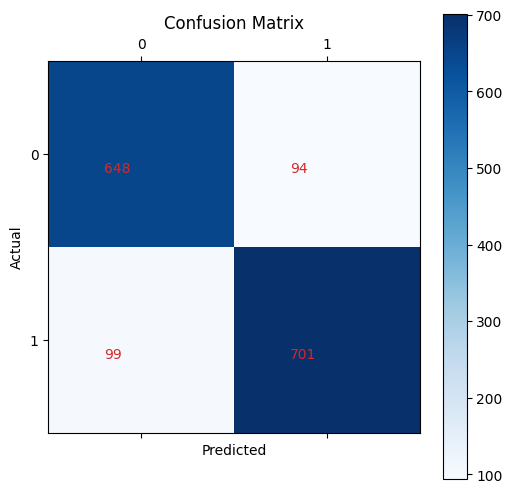


Logistic Regression (Stemmed)
CV average score: 0.88
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       742
           1       0.88      0.88      0.88       800

    accuracy                           0.88      1542
   macro avg       0.88      0.88      0.88      1542
weighted avg       0.88      0.88      0.88      1542

Train Accuracy: 0.956
Test Accuracy: 0.875
Precision: 0.875
Recall: 0.875
F1 Score: 0.875

Logistic Regression (Lemmatized)
CV average score: 0.88
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       742
           1       0.88      0.89      0.88       800

    accuracy                           0.88      1542
   macro avg       0.88      0.88      0.88      1542
weighted avg       0.88      0.88      0.88      1542

Train Accuracy: 0.960
Test Accuracy: 0.880
Precision: 0.880
Recall: 0.880
F1 Score: 0.880

Random Forest (Initial)
CV average score: 0.86
       

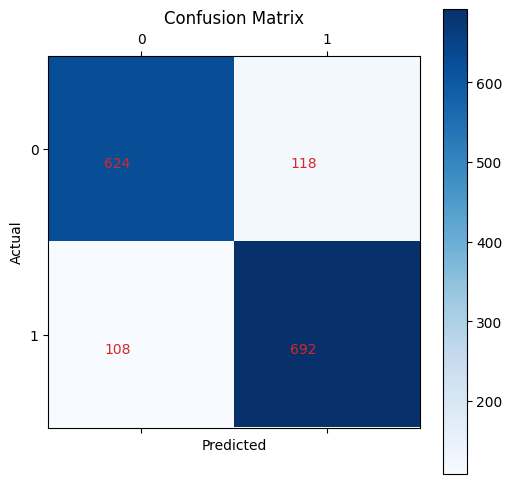


Random Forest (Stemmed)
CV average score: 0.87
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       742
           1       0.86      0.88      0.87       800

    accuracy                           0.86      1542
   macro avg       0.86      0.86      0.86      1542
weighted avg       0.86      0.86      0.86      1542

Train Accuracy: 1.000
Test Accuracy: 0.863
Precision: 0.863
Recall: 0.862
F1 Score: 0.862

Random Forest (Lemmatized)
CV average score: 0.86
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       742
           1       0.84      0.88      0.86       800

    accuracy                           0.85      1542
   macro avg       0.85      0.85      0.85      1542
weighted avg       0.85      0.85      0.85      1542

Train Accuracy: 1.000
Test Accuracy: 0.850
Precision: 0.850
Recall: 0.849
F1 Score: 0.849

SVM (Initial)
CV average score: 0.89
              precision    re

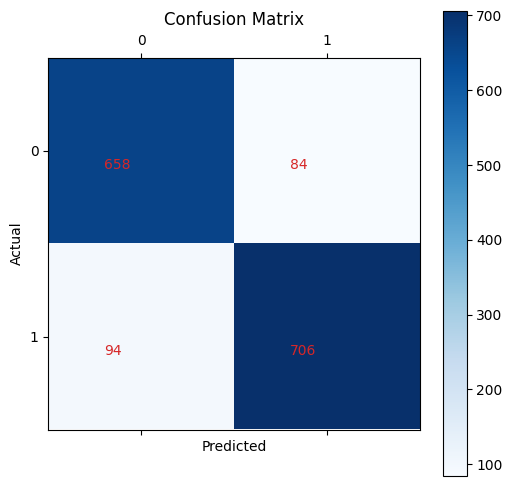


SVM (Stemmed)
CV average score: 0.89
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       742
           1       0.89      0.89      0.89       800

    accuracy                           0.89      1542
   macro avg       0.89      0.89      0.89      1542
weighted avg       0.89      0.89      0.89      1542

Train Accuracy: 0.995
Test Accuracy: 0.886
Precision: 0.886
Recall: 0.886
F1 Score: 0.886

SVM (Lemmatized)
CV average score: 0.89
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       742
           1       0.89      0.89      0.89       800

    accuracy                           0.89      1542
   macro avg       0.89      0.89      0.89      1542
weighted avg       0.89      0.89      0.89      1542

Train Accuracy: 0.995
Test Accuracy: 0.888
Precision: 0.888
Recall: 0.888
F1 Score: 0.888


In [ ]:
# Modellerin eğitilmesi ve değerlendirilmesi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {'Initial': {}, 'Stemmed': {}, 'Lemmatized': {}}

for model_name, model in models.items():
    print(f"\n{model_name} (Initial)")
    results['Initial'][model_name] = train_and_evaluate(model, X_train_initial, X_test_initial, y_train, y_test, visualize_confusion_matrix=True)

    print(f"\n{model_name} (Stemmed)")
    results['Stemmed'][model_name] = train_and_evaluate(model, X_train_stemmed, X_test_stemmed, y_train, y_test)

    print(f"\n{model_name} (Lemmatized)")
    results['Lemmatized'][model_name] = train_and_evaluate(model, X_train_lemmatized, X_test_lemmatized, y_train, y_test)

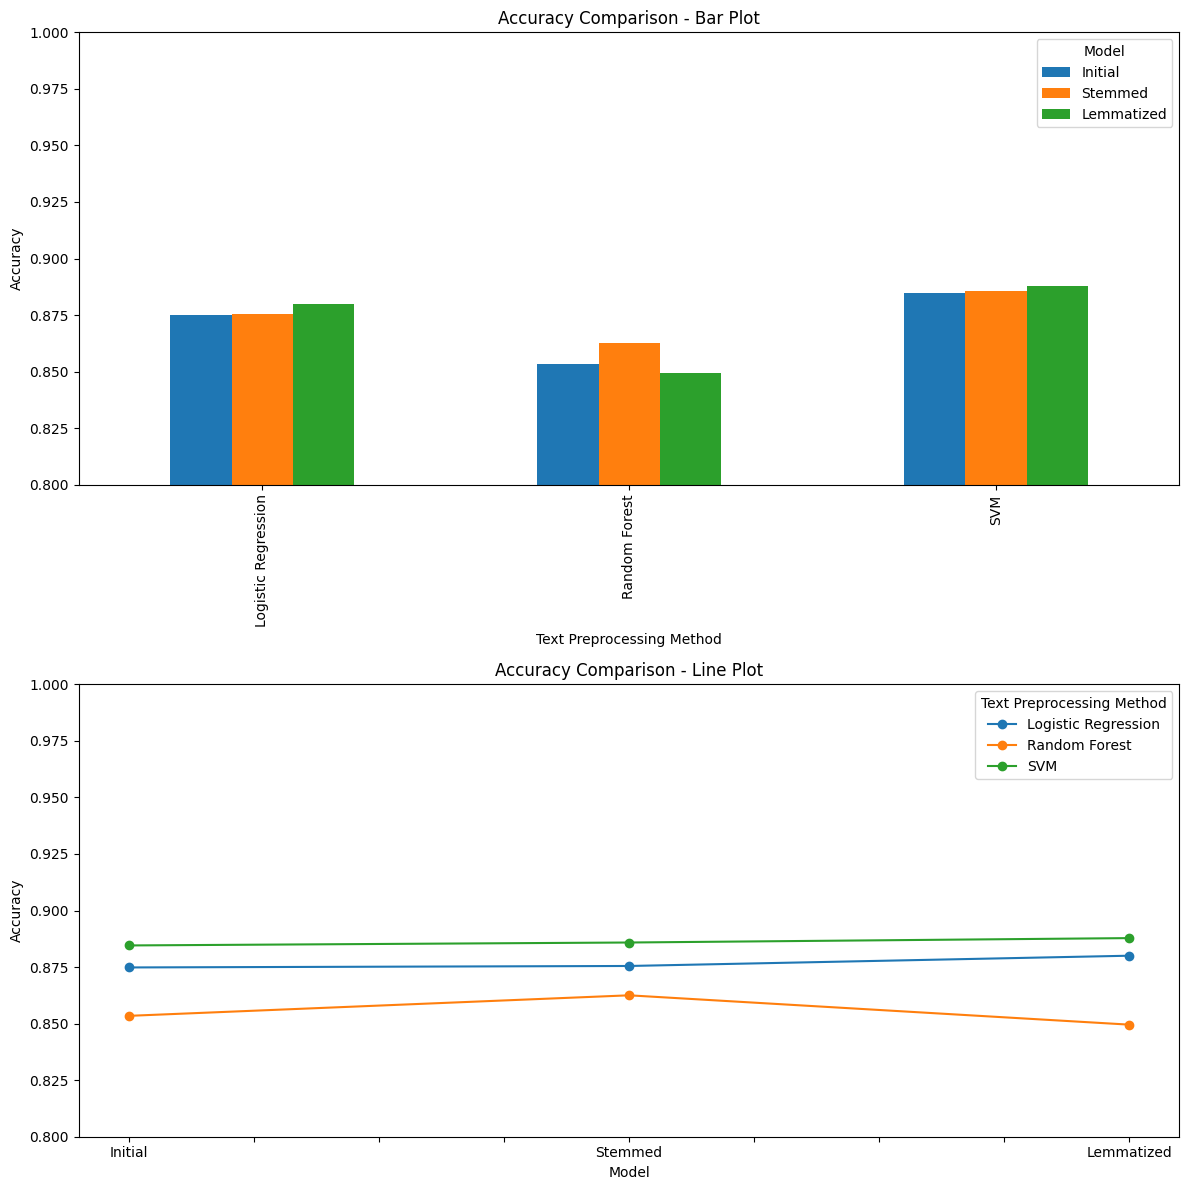

In [ ]:
# Doğruluk değerlerini grafikle gösterme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Çubuk grafiği
accuracies_df = pd.DataFrame(results)
accuracies_df.plot(kind='bar', ax=axs[0])
axs[0].set_ylim(0.8, 1)
axs[0].set_title('Accuracy Comparison - Bar Plot')
axs[0].set_xlabel('Text Preprocessing Method')
axs[0].set_ylabel('Accuracy')
axs[0].legend(title='Model')

# Çizgi grafiği
accuracies_df.T.plot(kind='line', marker='o', ax=axs[1])
axs[1].set_ylim(0.8, 1)
axs[1].set_title('Accuracy Comparison - Line Plot')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Accuracy')
axs[1].legend(title='Text Preprocessing Method')

plt.tight_layout()
plt.show()

In [ ]:
# Pozitif yorumların yüzdelik oranını hesaplama fonksiyonu
def calculate_percentage_of_positive_reviews(y_true):
    positive_reviews = np.sum(y_true)
    total_reviews = len(y_true)
    percentage = (positive_reviews / total_reviews) * 100
    return percentage

# Eğitim ve test setlerindeki pozitif yorum oranları
train_positive_percentage = calculate_percentage_of_positive_reviews(y_train)
test_positive_percentage = calculate_percentage_of_positive_reviews(y_test)

print(f'Training set positive reviews: {train_positive_percentage:.4f}%')



Training set positive reviews: 51.8567%


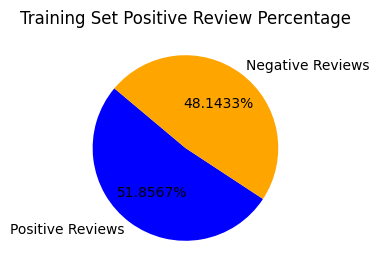

In [ ]:
# Pasta dilimi grafiği
plt.subplot(1, 2, 2)
labels = ['Positive Reviews', 'Negative Reviews']
sizes_train = [train_positive_percentage, 100 - train_positive_percentage]

plt.pie(sizes_train, labels=labels, autopct='%1.4f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Training Set Positive Review Percentage')

plt.tight_layout()
plt.show()
